# Movie Ratings: IMDB vs Rotten Tomatoes vs Metacritic vs Fandango

### Summary:

* Fandango ratings are very unlikely to be in the bottom 60% of their 5-star scale. They also have a median and quartiles that are higher than those of their peers. This evidence support FiveThirtyEight's assertion to be wary of their ratings.
* But also be wary of IMDB ratings, which are skewed in the positive direction of their 10-point scale. They also have a relatively narrow IQR/spread.
* Rotten Tomatoes and Metacritic ratings span most of the 100-point scales
* Rotten Tomatoes has the most uniform distribution of ratings. 

### Source

FiveThirtyEight sampled 147 films from 2015 and made it available to the public here. Based on this data, they published this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](https://fivethirtyeight.com/features/fandango-movies-ratings/). Thanks for the contribution to the open source community, FiveThirtyEight!

### Exploratory Data Analysis

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
reviews = pd.read_csv('movie_ratings.csv')

# Focus on just the average scores from users (Note: Metacritic and Rotten Tomatoes aggregate scores critics also)
# All scores normalized to a 5 point scale
norm_columns = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[norm_columns]
norm_reviews.head(1)

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


#### Example: Average user ratings for Avengers Age of Ultron (2015)

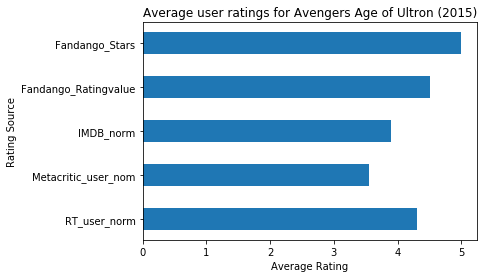

In [17]:
num_cols = norm_columns[1:] # we don't want the 'FILM' column in our plot

figure, axis = plt.subplots()
widths = norm_reviews[num_cols].iloc[0].values
bottoms = np.arange(1,6,1) # staring a 1, ending at 6, increment by 1
height = 0.5
axis.barh(bottoms, widths, height)
axis.set_yticks(np.arange(1,6))
axis.set_yticklabels(num_cols)
plt.title('Average user ratings for Avengers Age of Ultron (2015)')
plt.ylabel('Rating Source')
plt.xlabel('Average Rating')
plt.show()


### Fadango vs Rotten Tomatoes, Metacritic, and IMDB

#### Scatter Plots

Let's see how Fandango ratings correlate with all 3 of the other review sites

When generating multiple scatter plots for the purpose of comparison, it's important that all plots share the same ranges in the x-axis and y-axis.


Note: as stated previously, all ratings have been normalized to a 5-point scale. 

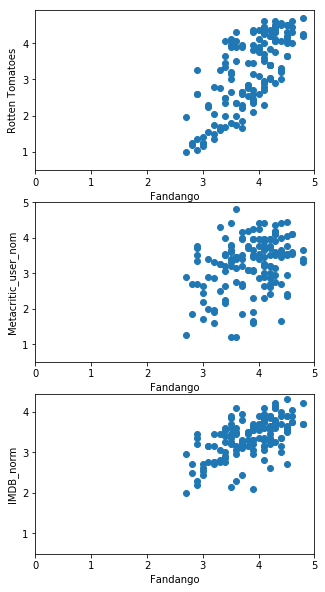

In [18]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

Fa = reviews['Fandango_Ratingvalue']
RT = reviews['RT_user_norm']
Me = reviews['Metacritic_user_nom']
IM = reviews['IMDB_norm']

ax1.scatter(Fa,RT)
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0,5)
ax1.set_ylim(0.5)

ax2.scatter(Fa,Me)
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic_user_nom')
ax2.set_xlim(0,5)
ax2.set_ylim(0.5)

ax3.scatter(Fa,IM)
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB_norm')
ax3.set_xlim(0,5)
ax3.set_ylim(0.5)

plt.show()

Seems like Fandango doesn't have very many ratings below a 3! IMDB doesn't have many below 2, but Rotten Tomatoes and Metacritic seem to utilize the full rating spectrum.

#### Histograms

In [19]:
# created a new dataframe with only the columns we want to work with
norm_reviews = reviews[norm_columns]
#norm_reviews[:5].head()

In [20]:
# explored some of the value counts
fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts()
fandango_distribution = fandango_distribution.sort_index()
imdb_distribution = norm_reviews['IMDB_norm'].value_counts()
imdb_distribution = imdb_distribution.sort_index()
#print(fandango_distribution, imdb_distribution)

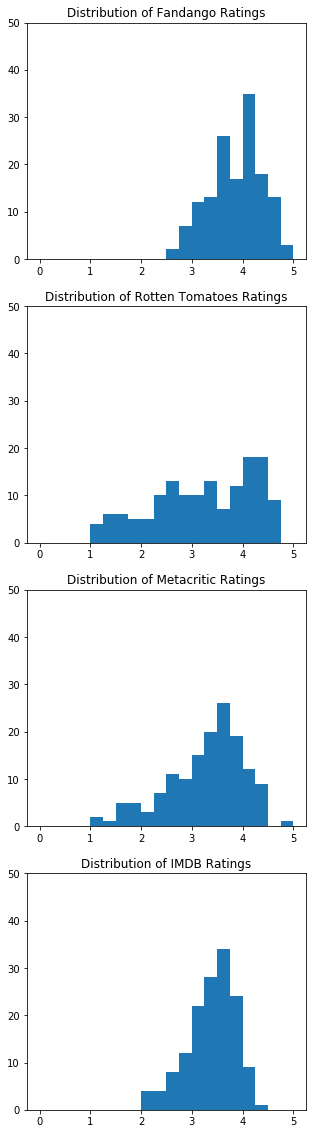

In [21]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0,5))
ax2.set_ylim(0,50)
ax2.set_title('Distribution of Rotten Tomatoes Ratings')

ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(0,5))
ax3.set_ylim(0,50)
ax3.set_title('Distribution of Metacritic Ratings')

ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0,5))
ax4.set_ylim(0,50)
ax4.set_title('Distribution of IMDB Ratings')

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0,5))
ax1.set_ylim(0,50)
ax1.set_title('Distribution of Fandango Ratings')

plt.show()

Rotten Tomatoes has the most uniform distribution of ratings

#### Boxplots

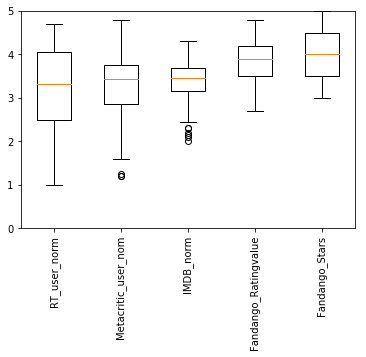

In [22]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_ylim(0,5)
ax.set_xticklabels(num_cols, rotation=90)
plt.show()

Rotten Tomatoes ratings have the biggest IQR (i.e. largest spread). IMDB ratings have th smallest.
Fandango ratings have a median and quartiles that are higher than those of their peers.